In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
import os
import pandas as pd
import kagglehub

# ดาวน์โหลด dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")

# ตรวจสอบไฟล์ภายในโฟลเดอร์
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]  # หาไฟล์ CSV
csv_path = os.path.join(path, csv_file)  # สร้างพาธที่ถูกต้อง

# โหลดข้อมูล
df = pd.read_csv(csv_path)

# ดูตัวอย่างข้อมูล
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


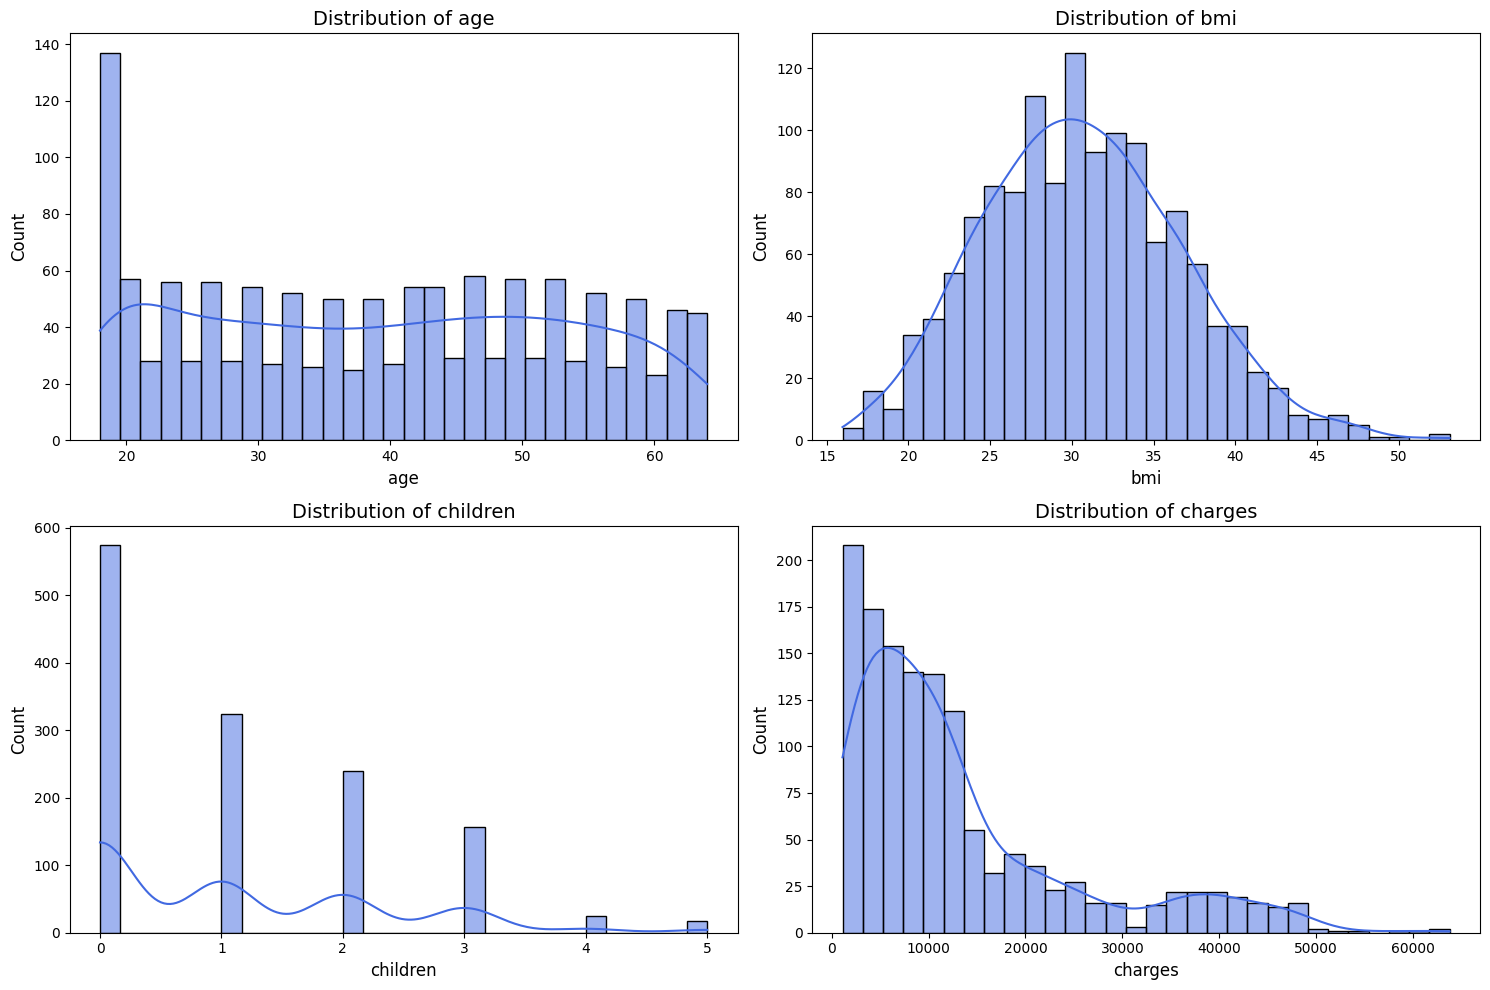

In [30]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_columns = df.select_dtypes(include=['number']).columns

# ตั้งค่าขนาดของกราฟ
n_cols = 2  # จำนวนคอลัมน์
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # คำนวณจำนวนแถวให้พอดีกับคอลัมน์

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# วนลูปสร้าง histogram สำหรับแต่ละคอลัมน์
for i, col in enumerate(numeric_columns):
    ax = axes[i // n_cols, i % n_cols]  # กำหนดแกนตามตำแหน่ง
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='royalblue')
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

# ปรับระยะห่างระหว่าง subplot
plt.tight_layout()
plt.show()


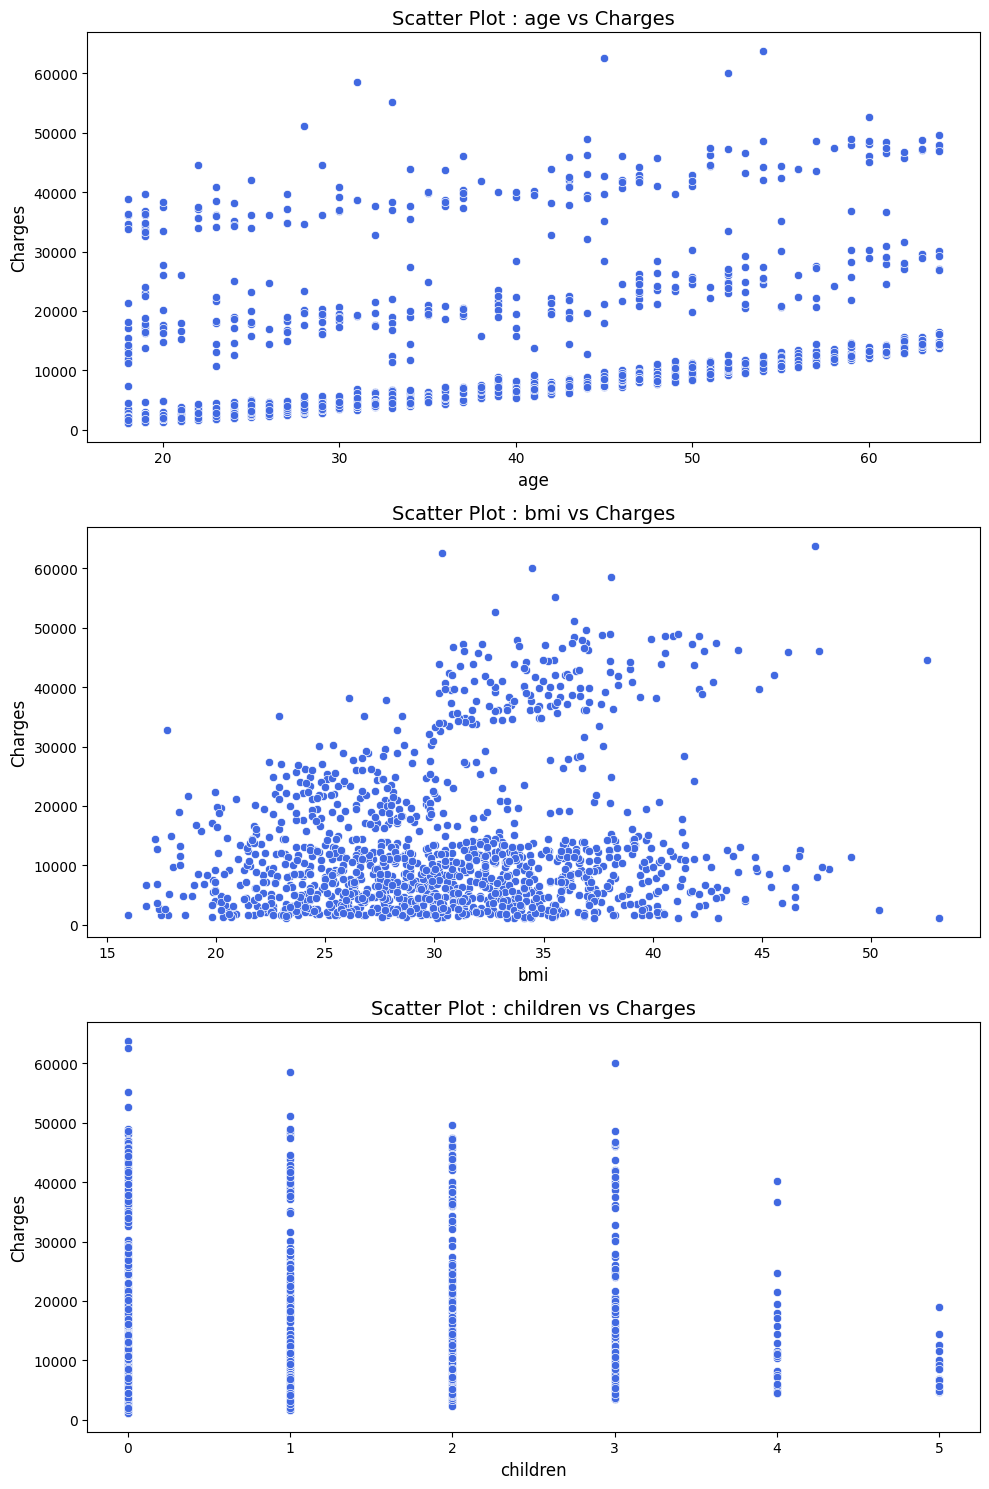

In [31]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_columns = df.select_dtypes(include=['number']).columns

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(10, 15))

# วนลูปสร้าง scatter plot สำหรับแต่ละคอลัมน์เชิงตัวเลข
for i, col in enumerate(numeric_columns):
    if col != 'charges':  # ข้ามคอลัมน์ 'charges'
        plt.subplot(len(numeric_columns) - 1, 1, i + 1)  # สร้าง subplot
        sns.scatterplot(x=df[col], y=df['charges'], color='royalblue')
        plt.title(f"Scatter Plot : {col} vs Charges", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Charges", fontsize=12)

# ปรับระยะห่างระหว่าง subplot
plt.tight_layout()
plt.show()


C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2941787989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='charges', ax=ax, palette='viridis', estimator='mean')
C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2941787989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='charges', ax=ax, palette='viridis', estimator='mean')
C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2941787989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=col, y='charges', ax=ax, palette='viridis', esti

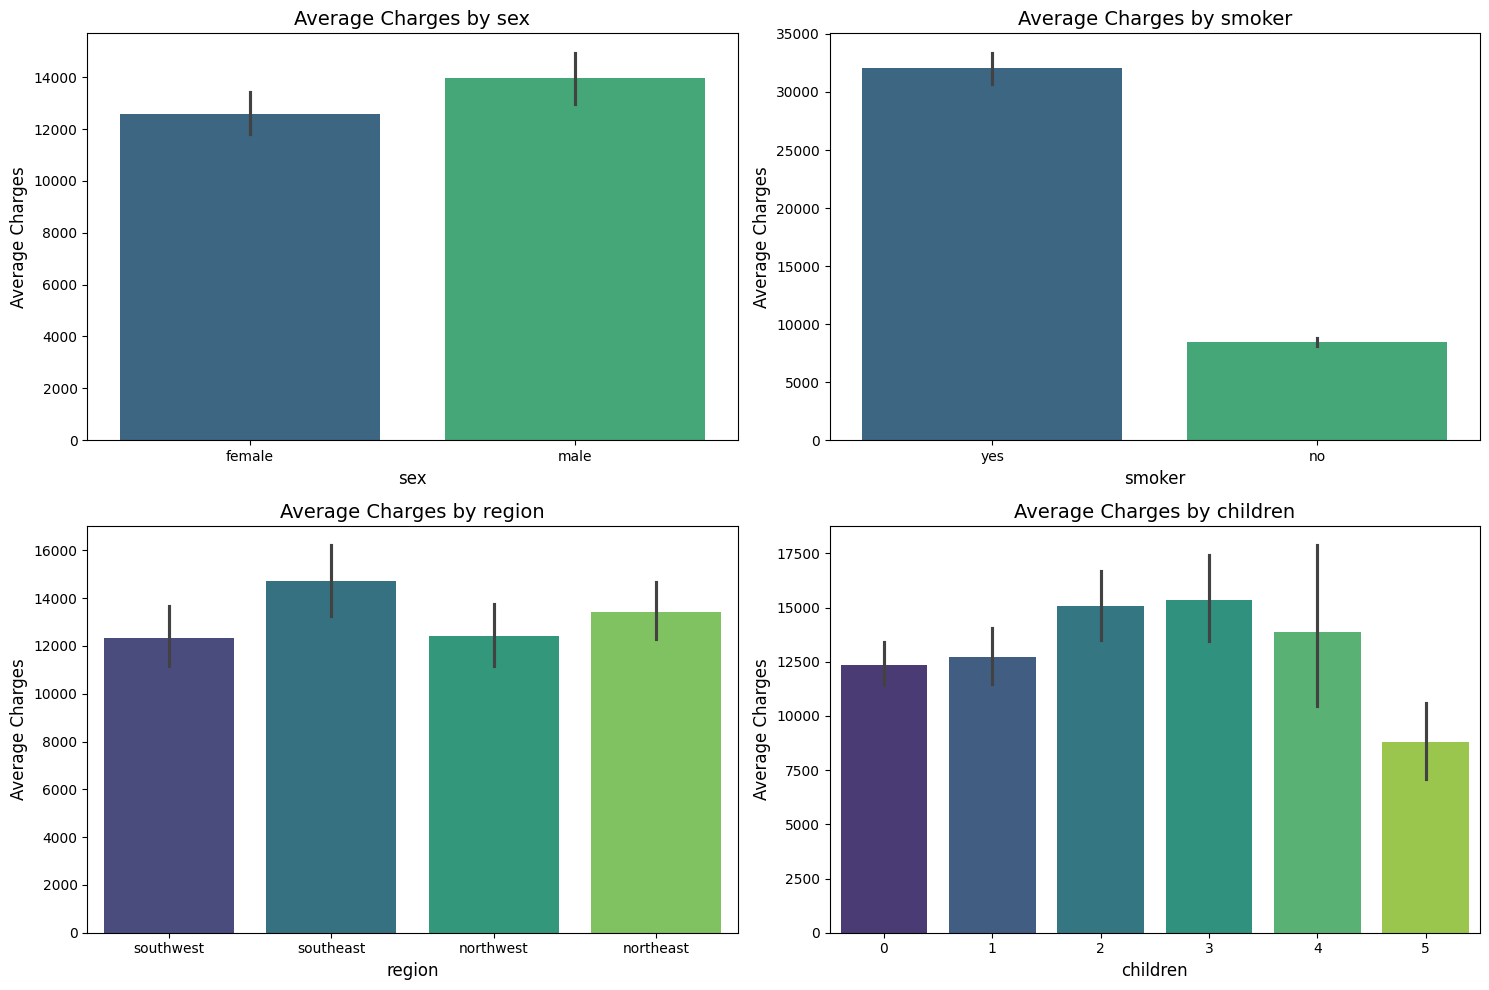

In [32]:
# กำหนดคอลัมน์ที่ต้องการใช้ในการจัดกลุ่ม
group_columns = ['sex', 'smoker', 'region', 'children']

# ตั้งค่าขนาดของกราฟ
n_cols = 2  # จำนวนคอลัมน์
n_rows = (len(group_columns) + n_cols - 1) // n_cols  # คำนวณจำนวนแถวให้พอดีกับคอลัมน์

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# วนลูปสร้าง bar plot สำหรับแต่ละคอลัมน์
for i, col in enumerate(group_columns):
    ax = axes[i // n_cols, i % n_cols]  # กำหนดแกนตามตำแหน่ง
    sns.barplot(data=df, x=col, y='charges', ax=ax, palette='viridis', estimator='mean')
    ax.set_title(f"Average Charges by {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Average Charges", fontsize=12)

# ปรับระยะห่างระหว่าง subplot
plt.tight_layout()
plt.show()


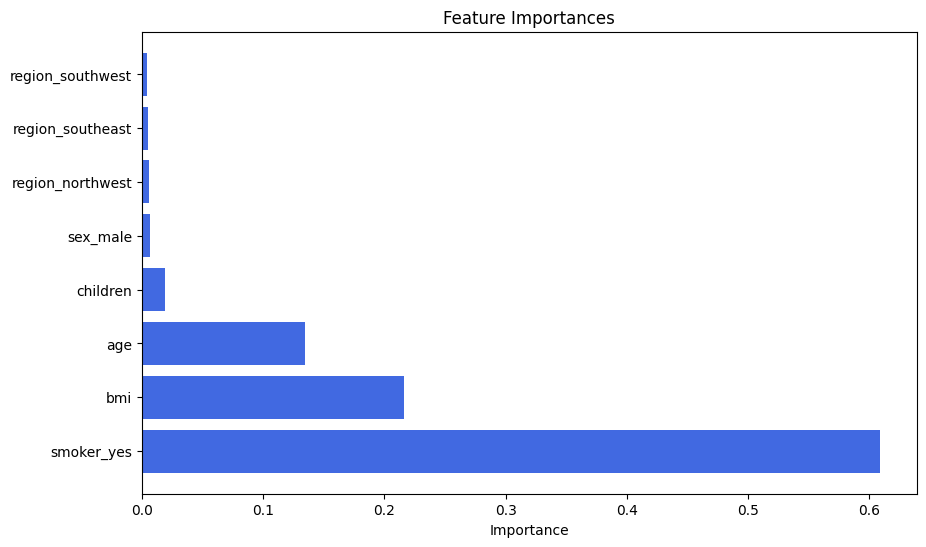

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# เตรียมข้อมูล
X = df.drop(columns=['charges'])
y = df['charges']

# แปลงข้อมูลเชิงหมวดหมู่เป็นตัวเลข
X = pd.get_dummies(X, drop_first=True)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ตรวจสอบ feature importances
importances = model.feature_importances_
feature_names = X.columns

# สร้าง DataFrame เพื่อจัดเรียงความสำคัญ
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# แสดงผล
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [34]:
### SLR (OLS)
# @title 1.1 linear reg
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the
 target values.
        """
        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_
print(X['bmi'].values.reshape(-1, 1).shape, y.shape)
# hours_reshape, gpa_reshape = X['bmi'].reshape(-1, 1), y.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch() # Import and initialize scikit-learn class for linear regression models
lin_reg_scratch.fit(X['bmi'].values.reshape(-1, 1), y) # Train regression model
lin_reg_scratch.coef_, lin_reg_scratch.intercept_ # Take a look at the parameters learnt

(1338, 1) (1338,)


(array([431.29819703]), np.float64(45.35448407620377))

coef : 431.29819703346317 
Intercept : 45.35448407620377
------------------------------
Simple Linear Regression (SLR) : Y = 431.3X + 45.35


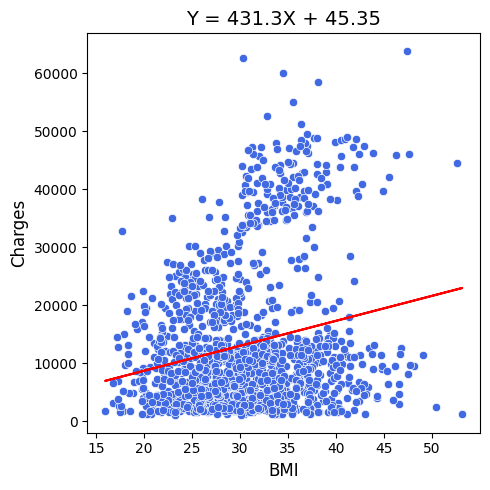

In [35]:
print(f"coef : {lin_reg_scratch.coef_[0]} \nIntercept : {lin_reg_scratch.intercept_}")
m = lin_reg_scratch.coef_.round(2)
c = lin_reg_scratch.intercept_.round(2)
print("-"*30)
print(f"Simple Linear Regression (SLR) : Y = {m[0]}X + {c}")
# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(5, 5))

sns.scatterplot(x=df['bmi'], y=df['charges'], color='royalblue')
plt.title(f"Y = {m[0].round(2)}X + {c.round(2)}", fontsize=14)
plt.plot(df['bmi'], df['bmi']*m + c, color = 'red')
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Charges", fontsize=12)

# ปรับระยะห่างระหว่าง subplot
plt.tight_layout()
plt.show()

In [36]:
import numpy as np

class UpdatedLinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.history = []  # เก็บค่าต่าง ๆ ในแต่ละรอบ

    def fit(self, X, y):
        m, n = X.shape  # จำนวนตัวอย่างและจำนวนฟีเจอร์
        self.coef_ = np.random.randn(n) * 0.01  # ค่าสุ่มขนาดเล็ก
        self.intercept_ = 0  # เริ่มต้นที่ 0

        for i in range(self.n_iterations):
            # คำนวณค่าที่โมเดลทำนาย
            y_pred = np.dot(X, self.coef_) + self.intercept_

            # ค่าคลาดเคลื่อน (Error)
            error = y_pred - y

            # คำนวณค่า Loss (Mean Squared Error - MSE)
            mse = np.mean(error**2)

            # คำนวณ Gradient
            intercept_gradient = (2/m) * np.sum(error)
            coef_gradient = (2/m) * np.dot(X.T, error)

            # อัปเดตค่าพารามิเตอร์
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

            # Log ค่า error และพารามิเตอร์ทุก ๆ 10 รอบ
            if i % 10 == 0:
                self.history.append({
                    'iteration': i,
                    'mse': mse,
                    'intercept': self.intercept_,
                    'coef': self.coef_.copy()  # เก็บค่าแยกกันเพื่อไม่ให้ถูกแก้ไข
                })
                print(f"Iteration {i}: MSE={mse:.6f}, Intercept={self.intercept_:.6f}, Coef={self.coef_}")

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

# ใช้ค่าข้อมูล BMI เป็นฟีเจอร์
X_bmi = X['bmi'].values.reshape(-1, 1)

# สร้างโมเดลและฝึกเรียนรู้
lr = 0.00002
n_iter = 120
lin_reg_updated = UpdatedLinearRegressionScratch(learning_rate=lr, n_iterations=n_iter)
lin_reg_updated.fit(X_bmi, y)

# ดูค่าพารามิเตอร์ที่เรียนรู้
lin_reg_updated.coef_, lin_reg_updated.intercept_


Iteration 0: MSE=322654357.192891, Intercept=0.530828, Coef=[16.85357414]
Iteration 10: MSE=222658592.361239, Intercept=4.824181, Coef=[153.12835779]
Iteration 20: MSE=177656537.035056, Intercept=7.710275, Coef=[244.54809936]
Iteration 30: MSE=157403828.977014, Intercept=9.652308, Coef=[305.87683993]
Iteration 40: MSE=148289307.371712, Intercept=10.961018, Coef=[347.01903511]
Iteration 50: MSE=144187410.790914, Intercept=11.844863, Coef=[374.61908811]
Iteration 60: MSE=142341393.992974, Intercept=12.443688, Coef=[393.13439622]
Iteration 70: MSE=141510612.440021, Intercept=12.851307, Coef=[405.55520402]
Iteration 80: MSE=141136726.955080, Intercept=13.130655, Coef=[413.88751683]
Iteration 90: MSE=140968462.795849, Intercept=13.323952, Coef=[419.47706313]
Iteration 100: MSE=140892736.376715, Intercept=13.459523, Coef=[423.22662477]
Iteration 110: MSE=140858655.605548, Intercept=13.556367, Coef=[425.74183287]


(array([427.28893495]), np.float64(13.62104478940038))

C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2421373455.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = float(lin_reg_updated.history[i]['coef'])  # แปลงเป็น float
C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2421373455.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = float(lin_reg_updated.history[i]['coef'])  # แปลงเป็น float
C:\Users\natta\AppData\Local\Temp\ipykernel_11388\2421373455.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

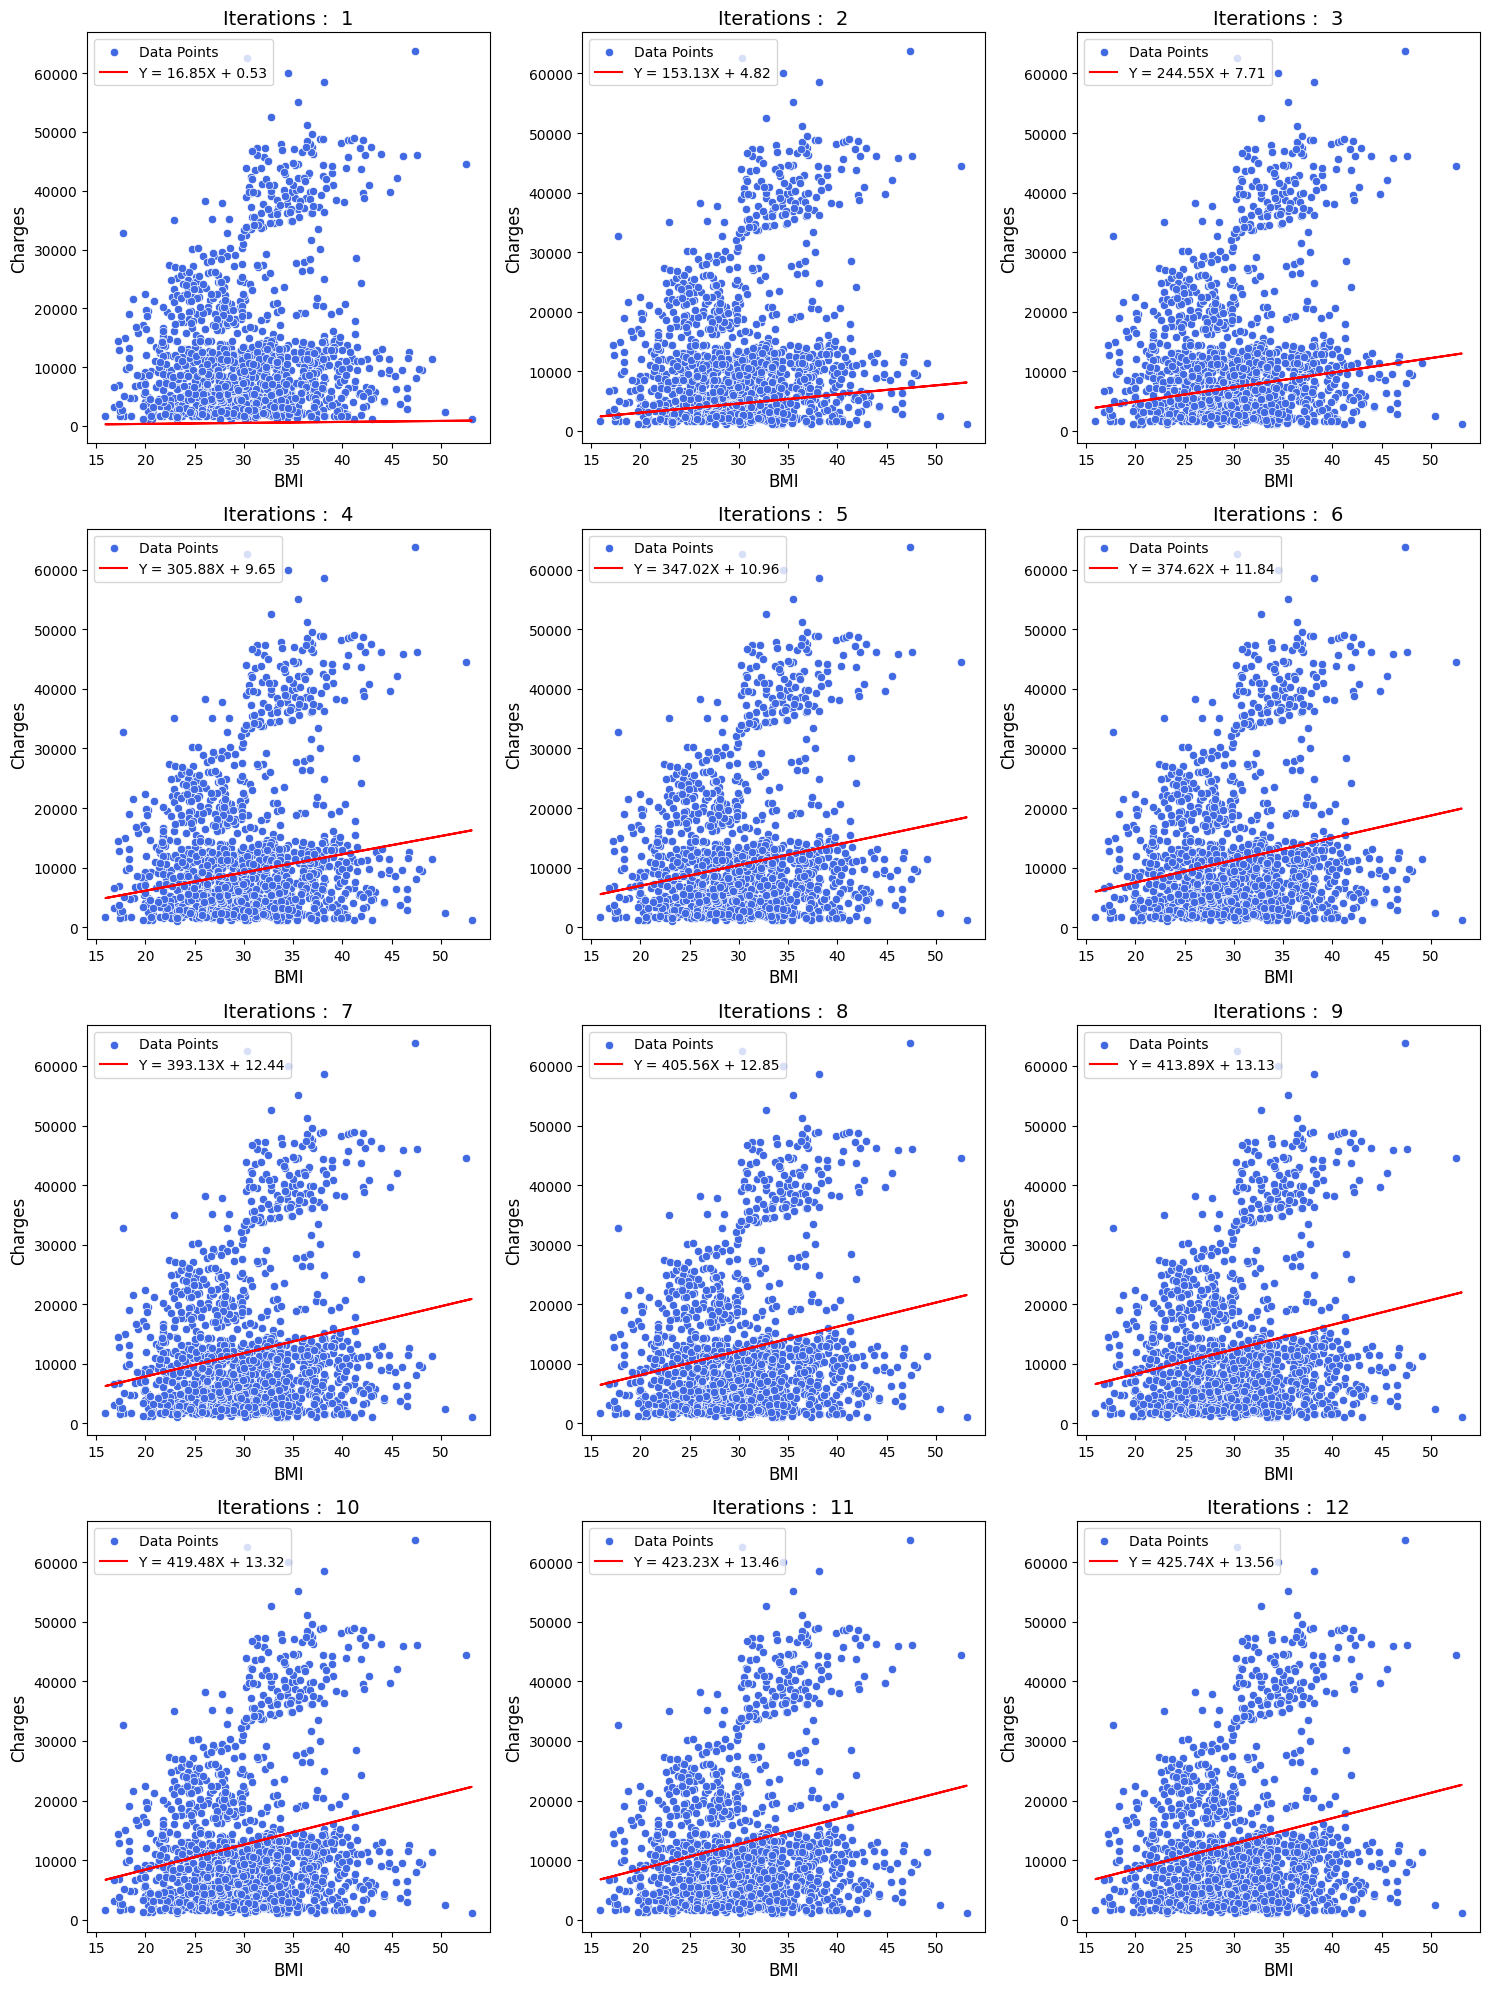

In [37]:
# ตั้งค่าขนาดของกราฟ
n_cols = 3  # จำนวนคอลัมน์
n_rows = 4  # จำนวนแถวที่ต้องการ (กำหนดเป็น 4 แถว)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

# วนลูปสร้าง scatter plot สำหรับแต่ละ subplot
for i in range(n_rows * n_cols):
    ax = axes.flatten()[i]  # ดึงแกนตาม index ที่กำหนด
    sns.scatterplot(x=df['bmi'], y=df['charges'], ax=ax, color='royalblue', label='Data Points')

    # คำนวณค่า slope และ intercept
    m = float(lin_reg_updated.history[i]['coef'])  # แปลงเป็น float
    c = float(lin_reg_updated.history[i]['intercept'])  # แปลงเป็น float

    # plot regression line
    ax.plot(df['bmi'], df['bmi'] * m + c, color='red', label=f'Y = {m:.2f}X + {c:.2f}')

    # ตั้งค่าชื่อแกน
    ax.set_title(f"Iterations :  {i + 1}", fontsize=14)
    ax.set_xlabel("BMI", fontsize=12)
    ax.set_ylabel("Charges", fontsize=12)
    ax.legend()

# ปรับระยะห่างระหว่าง subplot
plt.tight_layout()
plt.show()

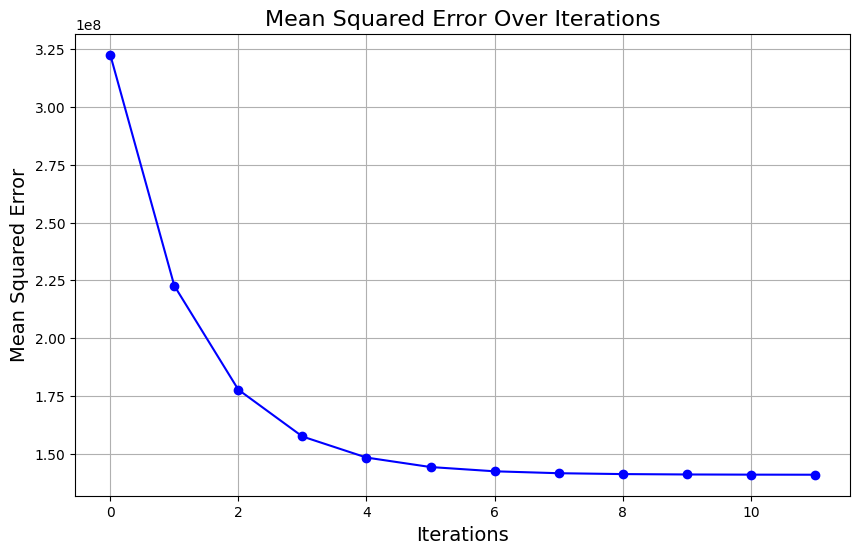

In [38]:
import matplotlib.pyplot as plt

# ดึงค่า MSE จาก history
mse_values = [entry['mse'] for entry in lin_reg_updated.history]

# สร้างกราฟเส้น
plt.figure(figsize=(10, 6))
plt.plot(mse_values, color='blue', marker='o')
plt.title('Mean Squared Error Over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.grid()
plt.show()

coef : 431.29819703346317 
Intercept : 45.35448407620377
Simple Linear Regression (SLR) : Y = 431.3X + 45.35
------------------------------
Mean Squared Error (MSE) : 149085057.04
R² Score : 0.04


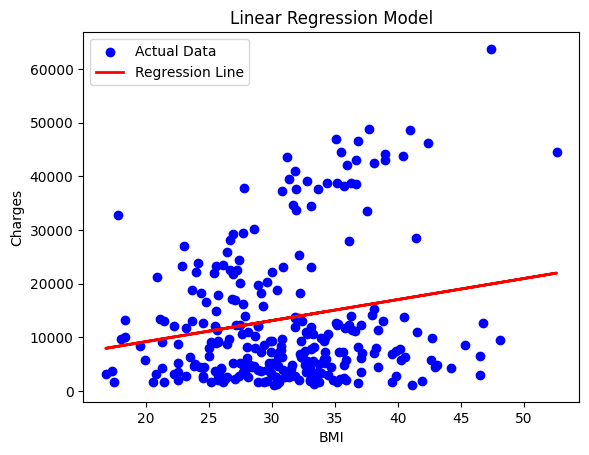

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ตัวอย่างข้อมูล (ใช้ dataset จริงแทนได้)
X = df[['bmi']]  # ฟีเจอร์ที่ใช้ทำนาย
y = df['charges']  # ค่าที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)  # ฝึกโมเดล

# ทำนายค่าบนชุดทดสอบ
y_pred = model.predict(X_test)

# คำนวณค่า MSE และ R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์
print(f"coef : {lin_reg_scratch.coef_[0]} \nIntercept : {lin_reg_scratch.intercept_}")
m = lin_reg_scratch.coef_.round(2)
c = lin_reg_scratch.intercept_.round(2)
print(f"Simple Linear Regression (SLR) : Y = {m[0]}X + {c}")
print("-"*30)
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R² Score : {r2:.2f}")

# สร้างกราฟแสดงเส้น Regression
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [40]:
from sklearn.preprocessing import OneHotEncoder

# แปลง sex และ smoker เป็นตัวเลข
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# ตรวจสอบข้อมูลหลังจาก One-Hot Encoding
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [41]:
from sklearn.preprocessing import StandardScaler

# แยกตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = df.drop(columns=['charges', 'region'])  # ตัวแปรอิสระ
y = df['charges']  # ตัวแปรตาม

# ใช้ StandardScaler กับ X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แปลงกลับเป็น DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# ตรวจสอบข้อมูลหลังจาก Scaling
print(X_scaled_df.head())


        age       sex       bmi  children    smoker
0 -1.438764  1.010519 -0.453320 -0.908614  1.970587
1 -1.509965 -0.989591  0.509621 -0.078767 -0.507463
2 -0.797954 -0.989591  0.383307  1.580926 -0.507463
3 -0.441948 -0.989591 -1.305531 -0.908614 -0.507463
4 -0.513149 -0.989591 -0.292556 -0.908614 -0.507463


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# แบ่งข้อมูล Train-Test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# ทำนายค่า charges
y_pred = model.predict(X_test)

# คำนวณค่า R² และ MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R-squared: 0.7811
Mean Squared Error (MSE): 33979257.05


In [43]:
# ค่า Intercept
print(f"Intercept: {model.intercept_}")

# ค่าสัมประสิทธิ์ของแต่ละตัวแปร
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print("-"*30)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Intercept: 13316.462576018226
    Feature  Coefficient
0       age  3610.458778
1       sex     3.975677
2       bmi  1996.614048
3  children   514.859607
4    smoker  9545.370703
------------------------------
R-squared: 0.7811
Mean Squared Error (MSE): 33979257.05


In [47]:
import joblib
joblib.dump(model, 'insurance_0218.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
features = np.array([[30, 1, 25, 1, 1]])
prediction = model.predict(features)
print(prediction)

[181609.78310773]


C:\Users\natta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
